<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


<details>
    <summary>Click here for Solution</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
```

</details>


### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment. If runing locally, use the path to the dataset provided.


In [ ]:
#path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [10]:
#Import the dataset with no headers
df = pd.read_csv('insurance.csv', header = None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


Add the headers to the dataframe, as mentioned in the project scenario. 


In [11]:
#Create a list for the column names
headers = ['Age', 'Sex', 'BMI', 'N_children', 'Smoker', 'Region', 'Charges']

#Set the column names to the list
df.columns = headers

df.head()

,Age,Sex,BMI,N_children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


Now, replace the '?' entries with 'NaN' values.


In [12]:
#The dataset contains '?' for missing values. Replace '?' with NaN
df.replace('?', np.nan, inplace = True)
df.head(10)

,Age,Sex,BMI,N_children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         2768 non-null   object 
 1   Sex         2772 non-null   int64  
 2   BMI         2772 non-null   float64
 3   N_children  2772 non-null   int64  
 4   Smoker      2765 non-null   object 
 5   Region      2772 non-null   int64  
 6   Charges     2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [23]:
#Let's first identify the missing values for continuous variables
missing_data_cont_vars = df.isnull()
missing_data_cont_vars = missing_data_cont_vars[['Age', 'BMI', 'N_children' ,'Charges']]
missing_data_cont_vars.value_counts()

Age    BMI    N_children  Charges
False  False  False       False      2768
True   False  False       False         4
Name: count, dtype: int64

We can see that only `Age` has 4 missing values. We will replace these with the mean age.

In [25]:
#Calculate the mean of 'Age' column
avg_age = df['Age'].astype('float').mean(axis = 0)
print("Average of age:", avg_age)

#Replace NaN with the mean value
df['Age'].replace(np.nan, avg_age, inplace = True)

#Identify the missing values for 'Age' column
print(df.isnull()['Age'].value_counts())

Average of age: 39.10982658959538
Age
False    2772
Name: count, dtype: int64


Also we need to set the correct data type for 'Age' because it is currently an object. We will set it to `int`.

In [29]:
df['Age'] = df['Age'].astype('int')

In [32]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2772 entries, 0 to 2771
Series name: Age
Non-Null Count  Dtype
--------------  -----
2772 non-null   int64
dtypes: int64(1)
memory usage: 21.8 KB


Now the same processes for the categorical attributes. Identify -> Replace -> Verify -> Update data type.

In [33]:
missing_data_cat_vars = df.isnull()
missing_data_cat_vars = missing_data_cat_vars[['Sex', 'Smoker', 'Region']]
missing_data_cat_vars.value_counts()

Sex    Smoker  Region
False  False   False     2765
       True    False        7
Name: count, dtype: int64

`Smoker` has 7 missing values. We will replace these with the most frequent value.

In [34]:
#Calculate the most frequent value for 'Smoker' column
most_freq_smoker = df['Smoker'].value_counts().idxmax()
print("***Most frequent value in smoker column: ", most_freq_smoker)

***Most frequent value in smoker column:  0


In [35]:
#Replace NaN with the most frequent value
df['Smoker'].replace(np.nan, most_freq_smoker, inplace = True)

#Verify the missing values for 'Smoker' column
print(df.isnull()['Smoker'].value_counts())

Smoker
False    2772
Name: count, dtype: int64


`Smoker` is currently an object. We will set it to `int`.

In [36]:
#Set the data type of 'Smoker' column to 'int'
df['Smoker'] = df['Smoker'].astype('int')

df['Smoker'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2772 entries, 0 to 2771
Series name: Smoker
Non-Null Count  Dtype
--------------  -----
2772 non-null   int64
dtypes: int64(1)
memory usage: 21.8 KB


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [37]:
df['Charges'].head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: Charges, dtype: float64

In [38]:
#Round the values in 'Charges' column to 2 decimal places
df['Charges'] = df['Charges'].round(decimals = 2)

df['Charges'].head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: Charges, dtype: float64

# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


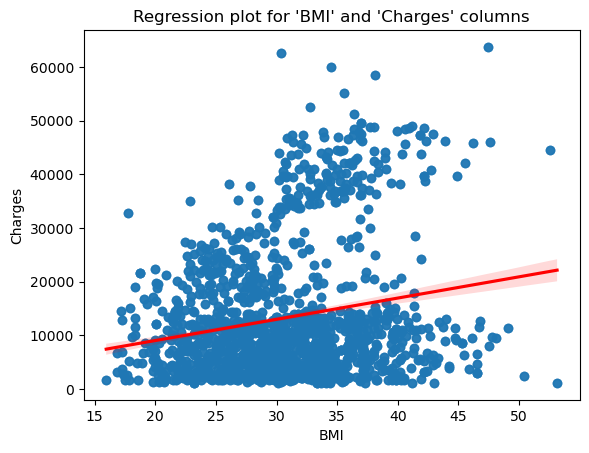

In [40]:
#Regression plot for 'BMI' and 'Charges' columns
sns.regplot(x = 'BMI', y = 'Charges', data = df, line_kws={"color": "red"})
plt.title("Regression plot for 'BMI' and 'Charges' columns")
plt.show()

Implement the box plot for `charges` with respect to `smoker`.


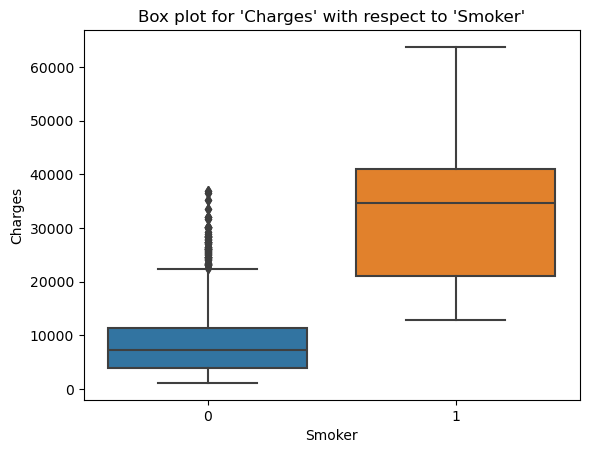

In [41]:
#Box plot for 'Charges' with respect to 'Smoker'
sns.boxplot(x = 'Smoker', y = 'Charges', data = df)
plt.title("Box plot for 'Charges' with respect to 'Smoker'")
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
sns.boxplot(x="smoker", y="charges", data=df)
```
</details>


Print the correlation matrix for the dataset.


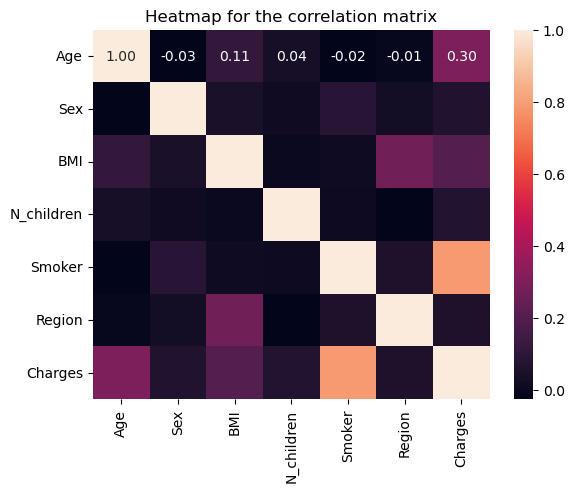

In [52]:
#Plot the correlation matrix for the dataset
corr_matrix = df.corr()

#Plot the heatmap for the correlation matrix, set the annotation to True for all the values
sns.heatmap(corr_matrix, annot = True, fmt='.2f')
plt.title("Heatmap for the correlation matrix")
plt.show()

# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [55]:
#Set X and Y variables
X = df[['Smoker']]
Y = df[['Charges']]

#Create a linear regression model
lm = LinearRegression()

#Fit the model with X and Y
lm.fit(X, Y)

#Print the score of the model
print("The R^2 score of the model is: ", lm.score(X, Y))

The R^2 score of the model is:  0.6221791733924185


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [56]:
#Set Z and Y variables -> Z are the features and Y is the target
Z = df[['Age', 'Sex', 'BMI', 'N_children', 'Smoker', 'Region']]
#Y -> previously defined

#Create a multiple linear regression model
mlr = LinearRegression()

#Fit the model with Z and Y
mlr.fit(Z, Y)

#Print the score of the model
print("The R^2 score of the model is: ", mlr.score(Z, Y))

The R^2 score of the model is:  0.7504083820289634


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [59]:
#Create the objects for the pipeline
Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias = False)), 
         ('model', LinearRegression())]

#Create the pipeline object
pipe = Pipeline(Input)

#Fit the pipeline object with Z and Y
pipe.fit(Z, Y)

#Pipe's prediction
ypipe = pipe.predict(Z)

#Print the score of the model
print("The R^2 score of the model is: ", pipe.score(Z, Y))

The R^2 score of the model is:  0.8451960996835602


/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


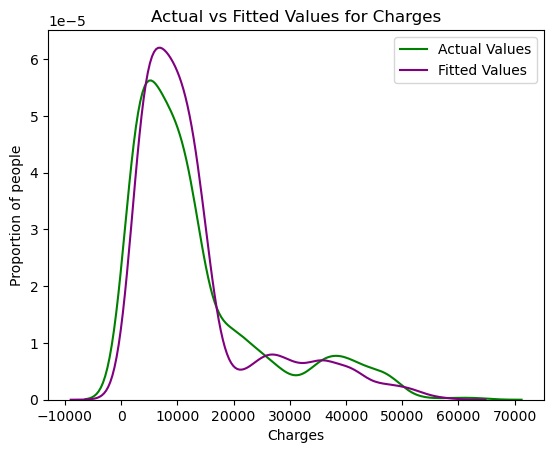

In [83]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual values
sns.kdeplot(Y.squeeze(), color='green', label='Actual Values', ax=ax)

# Plot the fitted values
sns.kdeplot(ypipe.squeeze(), color='purple', label='Fitted Values', ax=ax)

# Set labels and title
ax.set_xlabel("Charges")
ax.set_ylabel("Proportion of people")
ax.set_title("Actual vs Fitted Values for Charges")

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [86]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.2, random_state = 0)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [87]:
#Create a Ridge regression object
RidgeModel = Ridge(alpha = 0.1)

#Fit the model with x_train and y_train
RidgeModel.fit(x_train, y_train)

#Print the score of the model
print("The R^2 score of the Ridge model is: ", RidgeModel.score(x_test, y_test))

The R^2 score of the Ridge model is:  0.7469894680059708


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [88]:
#Create a PolynomialFeatures object of degree 2
pr = PolynomialFeatures(degree = 2)

#Fit and transform the x_train and x_test
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

#Fit the model with x_train_pr and y_train
RidgeModel.fit(x_train_pr, y_train)

#Print the score of the model
print("The R^2 score of the poly-Ridge-model is: ", RidgeModel.score(x_test_pr, y_test))

The R^2 score of the poly-Ridge-model is:  0.8410037679926494


/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pedro_rgz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


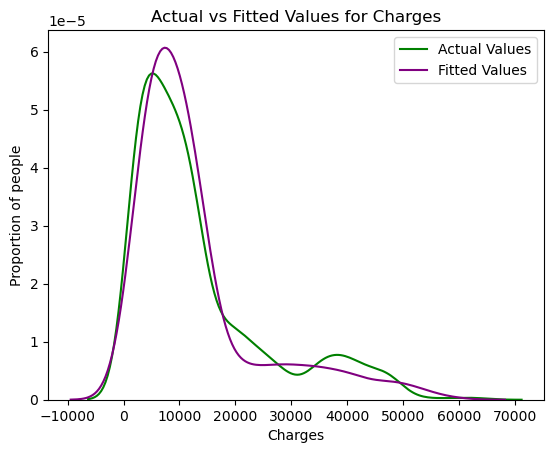

In [89]:
#Get the predicted values
yhat_polyRM = RidgeModel.predict(x_test_pr)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual values
sns.kdeplot(Y.squeeze(), color='green', label='Actual Values', ax=ax)

# Plot the fitted values
sns.kdeplot(yhat_polyRM.squeeze(), color='purple', label='Fitted Values', ax=ax)

# Set labels and title
ax.set_xlabel("Charges")
ax.set_ylabel("Proportion of people")
ax.set_title("Actual vs Fitted Values for Charges")

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
